# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_targets.csv, test_inputs.csv, test_targets.csv) in the colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [8]:
from google.colab import files
uploaded = files.upload()
%ls

Saving test_inputs.csv to test_inputs.csv
Saving test_targets.csv to test_targets.csv
Saving train_inputs.csv to train_inputs.csv
Saving train_targets.csv to train_targets.csv
sample_data/     test_targets.csv  train_targets.csv
test_inputs.csv  train_inputs.csv


# Import libraries 
Do not use any other Python library.

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Function: load_generalized_linear_regression_data

This function loads the data for Generalized Linear Regression from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_targets**: numpy array of N training targets
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_targets**: numpy array of N' test targets

In [145]:
def load_generalized_linear_regression_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_targets = np.genfromtxt('test_targets.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_targets = np.genfromtxt('train_targets.csv', delimiter=',')
  return train_inputs, train_targets, test_inputs, test_targets

# Function: predict_generalized_linear_regression

This function uses a vector of weights to make predictions for a set of inputs.

Inputs:
*   **inputs**: matrix of input data points for which we want to make a prediction (numpy array of N data points x M' features)
*   **weights**: vector of weights (numpy array of M' weights)

Output:
*   **predicted_values**: vector of predicted values (numpy array of N floats)

In [138]:
def predict_generalized_linear_regression(inputs, weights):
  
  # dummy assignment until the function is filled in
  predicted_values = np.dot(inputs, weights)
  return predicted_values

# Function eval_generalized_linear_regression

This function evaluates a set of predictions by computing the mean squared error with respect to the targets

Inputs:
*   **inputs**: matrix of input data points for which we will evaluate the predictions (numpy array of N data points x M' features)
*   **weights**: vector of weights (numpy array of M' weights)
*   **targets**: vector of targets associated with the inputs (numpy array of N targets)

Output:
*   **mean_squared_error**: mean squared error between the predicted values and the targets (scalar)

In [165]:
def eval_generalized_linear_regression(inputs, weights, targets):

  # dummy assignment until the function is filled in
  mean_squared_error = 0
  predicted_values = predict_generalized_linear_regression(inputs, weights)
  # get MSE
  mean_squared_error = ((predicted_values - targets)**2).mean(axis=None)
  return mean_squared_error

# Function train_generalized_linear_regression

This function optimizes a set of weights for generalized linear regression based on a training set

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M' features)
*   **train_targets**: vector of targets associated with the inputs (numpy array of N targets)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M' weights)



In [150]:
def train_generalized_linear_regression(train_inputs, train_targets, lambda_hyperparam):

  # dummy assignment until the function is filled in
  weights = np.zeros(train_inputs.shape[1])

  # same in A1
  b = np.zeros(train_inputs.shape[1])
  A = np.dot(np.transpose(train_inputs), train_inputs)
  #get lamba*I + A
  lambda_A = lambda_hyperparam * np.identity(train_inputs.shape[1]) + A

  for i in range(train_inputs.shape[0]):
    b += train_targets[i] * train_inputs[i]
  #(lamba*I + A)w = b
  weights = np.linalg.solve(lambda_A, b)
  return weights

# Function monomial_features

This function computes monomial basis functions up to degree $d$: $\{\prod_i (x_i)^{n_i} | \sum_i n_i \le d\}$.  A monomial of degree
less than or equal to $d$ is a product of variables (e.g., $\prod_i (x_i)^{n_i}$ where the sum of their exponents is less
than or equal to d (i.e., $\sum_i n_i \le d$).

Inputs:
*   **max_degree**: maximum degree d for the monomial basis functions (integer)
*   **inputs**: matrix of input points (numpy array of N data points x M features)

Output:
*   **features**: matrix of data points in the new feature space induced by the monomial basis functions (numpy array of N data points x M' features)

In [172]:
def monomial_features(max_degree, inputs):

  # dummy assignment until the function is filled in
  features = np.array([])
  for i in range(len(inputs)):
    feature = np.array([])
    for a in range(max_degree + 1):
      for b in range(a, max_degree + 1):
        feature = np.append(feature, inputs[i][0] ** a * inputs[i][1] ** (b - a))
    if i == 0:
      features = np.concatenate(([features], [feature]), axis=1)
    else:
      features = np.concatenate((features, [feature]))
  return features

# Function cross_validation_generalized_linear_regression

This function performs k-fold cross validation to determine the best max degree of monomial basis functions in generalized linear regression

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different max degree (list of integers)
*   **inputs**: matrix of input points (numpy array of N data points by M' features)
*   **targets**: vector of targets associated with the inputs (numpy array of N targets)

Outputs:
*   **best_hyperparam**: best max degree (integer)
*   **best_mean_squared_error**: mean squared error achieved with best_hyperparam (float)
*   **mean_squared_errors**: vector of mean squared errors for the corresponding hyperparameters (numpy array of floats)



In [179]:
def cross_validation_generalized_linear_regression(k_folds, hyperparameters, inputs, targets):

  # dummy assignments until the function is filled in
  best_hyperparam = 0
  best_mean_squared_error = 0
  mean_squared_errors = np.zeros(len(hyperparameters))

  num_split = int(inputs.shape[0] / k_folds)
  for degree in range(len(hyperparameters)):
    mean_squared_error = 0
    for i in range(k_folds):
      train_inputs = np.concatenate((inputs[:i * num_split], inputs[(i+1) * num_split:]), axis = 0)
      train_targets = np.concatenate((targets[:i * num_split], targets[(i+1) * num_split:]), axis = 0)
      train_inputs = monomial_features(hyperparameters[degree],train_inputs)
      test_inputs = inputs[i * num_split: (i+1) * num_split]
      test_targets = targets[i * num_split: (i+1) * num_split]
      test_inputs = monomial_features(hyperparameters[degree],test_inputs)
      weights = train_generalized_linear_regression(train_inputs, train_targets, 1)
      mean_squared_error += eval_generalized_linear_regression(test_inputs, weights, test_targets)
    mean_squared_errors[degree] = mean_squared_error / k_folds
  # smaller MSE, better result
  best_mean_squared_error = mean_squared_errors[np.argmin(mean_squared_errors)]
  best_hyperparam = hyperparameters[np.argmin(mean_squared_errors)]

  return best_hyperparam, best_mean_squared_error, mean_squared_errors

# Function: plot_generalized_linear_regression_mean_squared_errors

Function that plots the mean squared errors for different lambda values (hyperparameters) in linear regression based on cross validation

Inputs:
*   **mean_squared_errors**: vector of mean squared errors for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different degree (list of floats)

In [177]:
def plot_generalized_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams):
  plt.plot(hyperparams,mean_squared_errors)
  plt.ylabel('mean squared error')
  plt.xlabel('degree')
  plt.show()

# Main Generalized Linear Regression code

Load data.
Use k-fold cross validation to find the best max degree of the monomial basis functions.
Plot mean squared errors for different degrees.
Test generalized linear regression with the best degree.

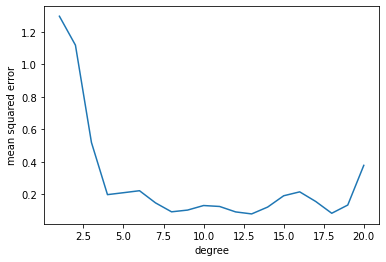

best degree: 13
best cross validation mean squared error: 0.08028473128960031
test mean squared error: 0.08348528862488538


In [180]:
# load data
train_inputs, train_targets, test_inputs, test_targets = load_generalized_linear_regression_data()

# hyperparams (degrees) to be evaluated by cross validation
hyperparams = range(1,21)
k_folds = 10

best_degree, best_mean_squared_error, mean_squared_errors = \
  cross_validation_generalized_linear_regression(k_folds,hyperparams,train_inputs,train_targets)

# plot results
plot_generalized_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams)
print('best degree: ' + str (best_degree))
print('best cross validation mean squared error: ' + str(best_mean_squared_error))

# train and evaluate with best degree
lambda_value = 1
generalized_train_inputs = monomial_features(best_degree, train_inputs)
generalized_test_inputs = monomial_features(best_degree, test_inputs)
weights = train_generalized_linear_regression(generalized_train_inputs,train_targets,lambda_value)
mean_squared_error = eval_generalized_linear_regression(generalized_test_inputs, weights, test_targets)
print('test mean squared error: ' + str(mean_squared_error))



What is the training time complexity of generalized linear regression as a function of the amount of training data, the dimensionality of the data in the original feature space and the maximum degree of the monomial basis functions? \\

Let's denote the amount of training data is N, dimensionality of the data is M and the max degree is d. \\

for the `monomial_feature()`, the time complexity equals to the number of features times amount if training data. As we have imensionality of the data, M and max_degree, d. The number of features with degree d will be $d + M + 1 \choose d$, thus the total number of features equals $\sum_{i=0}^{d}{M + i - 1 \choose i} = {M - 1 \choose 0} + {M \choose 1} + \dots + {M + d + 1 \choose d} = {M - 2 \choose 0} + {M - 1 \choose 0} + {M \choose 1} + \dots + {M + d - 1 \choose d} - 1 = {M + d \choose d + 1}$. \\
Thus the time complexity of `monomial_feature()` is $O(\frac{M^{d+1}}{{d + 1}!}N)$ \\

for `train_generalized_linear_regression`, as we have to do the inverse of matrix, so the time complexity is $O(N^3)$ \\

for `eval_generalized_linear_regression`, the runtime equals to `predict_values` plus calculating mean square error. So the total time complexity is $O(N^3)$ \\

Thus the training time complexity of generalized linear regression is $O(\frac{M^{d+1}}{{d + 1}^{d+1}}N + N^3)$

